**UAS AI**

Asraf Aprianto (3.34.19.1.03)

Muhammad Sultan Rafi (3.34.19.1.15)

IK-3B

Dataset Fetal Health (Kesehatan Janin)

In [ ]:
#basic & visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Pre-processing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelling Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
# Evaluation & CV Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")

In [ ]:
#ambil dataset
df =  pd.read_csv("fetal_health.csv")

#Menampilkan dataset
df.head(5)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Checking Dataset

In [ ]:
#menampilkan info baris dan kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

mengecek missing value

In [ ]:
# Check for missing value
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

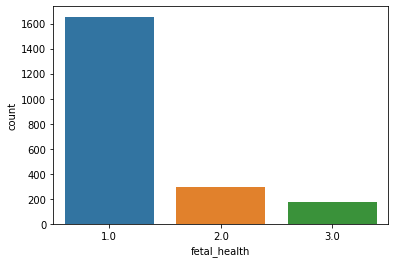

In [ ]:
# Explore the target variable
sns.countplot(df['fetal_health'])
df['fetal_health'].value_counts()

EDA

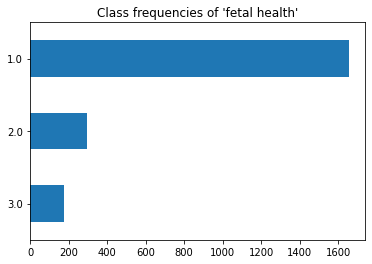

In [ ]:
# untuk menampilkan data "fetal health" secara keseluruhan

(df["fetal_health"].value_counts(ascending = True)
 .plot.barh()
 .set_title("Class frequencies of 'fetal health'"));

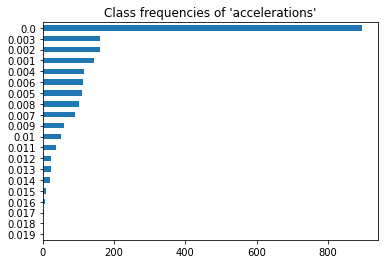

In [ ]:
# untuk menampilkan data "accelerations" secara keseluruhan

(df["accelerations"].value_counts(ascending = True)
 .plot.barh()
 .set_title("Class frequencies of 'accelerations'"));

Feature Selection (Pearson Method)

In [ ]:
df.corr(method='pearson')

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


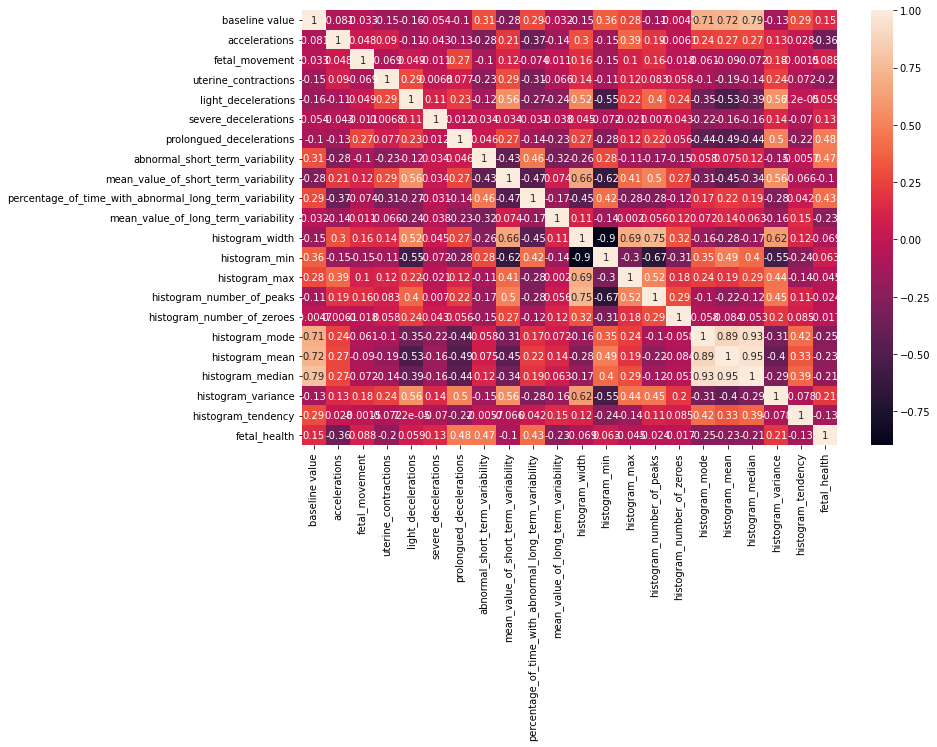

In [ ]:
# We will revist the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)


In [ ]:
# View the mean by the response variable

df.groupby('fetal_health').mean()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


In [ ]:
# View the stdDev by the response variable
df.groupby('fetal_health').std()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,9.454513,0.004001,0.040989,0.002756,0.002891,0.000025,0.000263,15.497354,0.818955,11.526078,...,36.348318,27.253543,17.764709,2.859883,0.690619,13.417249,13.015611,12.597506,22.295844,0.589320
2.0,7.889044,0.000726,0.041699,0.002660,0.001533,0.000000,0.000442,11.761252,0.661018,20.265309,...,39.512915,31.011483,16.336505,3.099983,0.800568,10.983418,10.518838,10.491251,18.250295,0.590345
3.0,9.433016,0.001008,0.085765,0.003627,0.004140,0.000182,0.001371,14.452231,1.199393,33.995702,...,49.071834,34.176930,21.674328,3.315274,0.675523,26.146833,22.782940,19.338092,60.581867,0.692984


Processing Data

In [ ]:
#deklarasi data
X = df.drop(labels=['prolongued_decelerations','abnormal_short_term_variability'], axis=1)
y = df['fetal_health']

# membagi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3, random_state=42,stratify = y)

In [ ]:
# normalisasi data agar lebih mudah untuk diolah
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN

0.9686520376175548
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       497
         2.0       0.91      0.88      0.89        88
         3.0       0.98      0.85      0.91        53

    accuracy                           0.97       638
   macro avg       0.95      0.91      0.93       638
weighted avg       0.97      0.97      0.97       638

[[496   0   1]
 [ 11  77   0]
 [  0   8  45]]


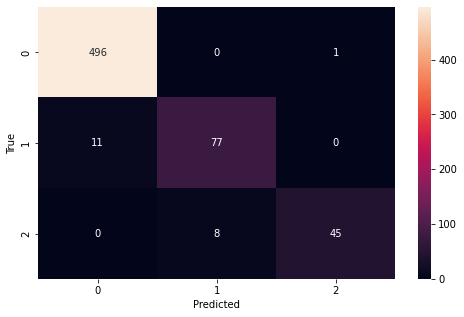

In [ ]:
# Creating model object
# model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
model_kn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform', algorithm = 'auto', metric = 'euclidean')

# Training Model
model_kn.fit(X_train, y_train)
# Making Prediction
pred_kn = model_kn.predict(X_test)
kn = accuracy_score(y_test, pred_kn)
print(kn)
print(classification_report(y_test,pred_kn))


cm = confusion_matrix(y_test, pred_kn)
print(cm)


f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,pred_kn), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Decision Tree

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       497
         2.0       1.00      1.00      1.00        88
         3.0       1.00      1.00      1.00        53

    accuracy                           1.00       638
   macro avg       1.00      1.00      1.00       638
weighted avg       1.00      1.00      1.00       638

1.0


[[497   0   0]
 [  0  88   0]
 [  0   0  53]]


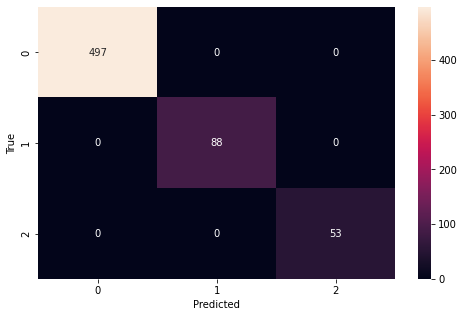

In [ ]:
# Creating model object
model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)

# Training Model
model_dt.fit(X_train,y_train)

# Making Prediction
pred_dt = model_dt.predict(X_test)
print(classification_report(y_test,pred_dt))
dt = accuracy_score(y_test, pred_dt)
print(dt)
print("\n")
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_dt)
print(cm3)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm3, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

SVM Linear

0.9843260188087775
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       497
         2.0       1.00      0.91      0.95        88
         3.0       1.00      0.96      0.98        53

    accuracy                           0.98       638
   macro avg       0.99      0.96      0.97       638
weighted avg       0.98      0.98      0.98       638

[[497   0   0]
 [  8  80   0]
 [  2   0  51]]


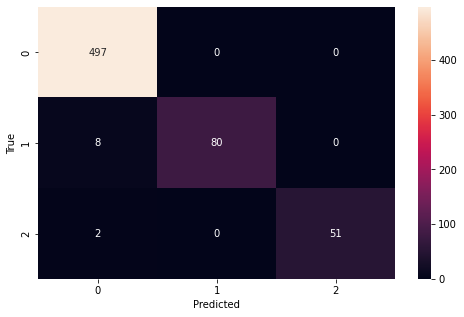

In [ ]:
model_svm = SVC(kernel='rbf', gamma=0.15, probability=True)
#model_svm = SVC(kernel='linear', gamma=0.15, probability=True)
model_svm.fit(X_train, y_train)
# Making Prediction
pred_svm = model_svm.predict(X_test)
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)
print(classification_report(y_test,pred_svm))


# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_svm)
print(cm4)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm4, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Logistic Regression

0.9984326018808778
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       497
         2.0       1.00      0.99      0.99        88
         3.0       0.98      1.00      0.99        53

    accuracy                           1.00       638
   macro avg       0.99      1.00      0.99       638
weighted avg       1.00      1.00      1.00       638

[[497   0   0]
 [  0  87   1]
 [  0   0  53]]


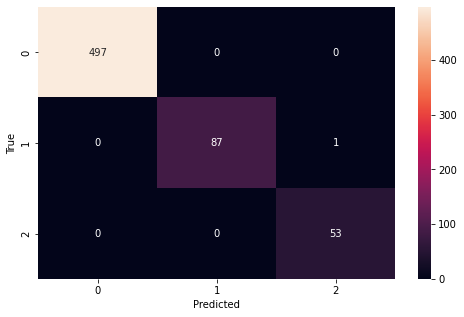

In [ ]:
# Creating model object
model_lg = LogisticRegression(max_iter=120, n_jobs=20)
# Training Model
model_lg.fit(X_train, y_train)
# Making Prediction
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)
print(classification_report(y_test,pred_lg))

cm2 = confusion_matrix(y_test, pred_lg)
print(cm2)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm2, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Random Forest

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 1/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 2/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 2/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 3/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 3/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 4/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 4/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=0.993 total time=   0.5s
[CV 5/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_es

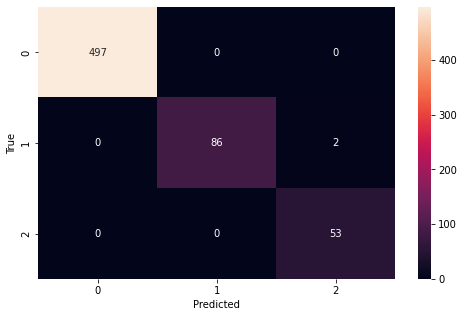

Accuracy Score - Random Forest
0.9968652037617555


Classification Report - Random Forest
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       497
         2.0       1.00      0.98      0.99        88
         3.0       0.96      1.00      0.98        53

    accuracy                           1.00       638
   macro avg       0.99      0.99      0.99       638
weighted avg       1.00      1.00      1.00       638



In [ ]:
param_grid = {'n_estimators': [200], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=100, cv=10, n_jobs=-2)
rfcgrid.fit(X_train, y_train)

# Best params of Random Forest
rfcgrid.best_params_

import seaborn as sns
import matplotlib.pyplot as plt

rfcpredictions = rfcgrid.predict(X_test)

print("\n")
print("Confusion Matrix - Random Forest Using Entropy Index")
print(confusion_matrix(y_test,rfcpredictions))
print("\n")

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,rfcpredictions), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Accuracy Score - Random Forest")
rf = accuracy_score(y_test, rfcpredictions)
print(rf)
print("\n")
print("Classification Report - Random Forest")
print(classification_report(y_test,rfcpredictions))


,Model,Accuracy_score
2,Decision Tree,1.000000
1,Logistic Regression,0.998433
4,Random Forest,0.996865
3,SVM,0.984326
0,KNeighbours,0.968652


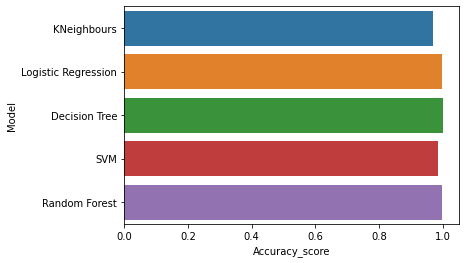

In [ ]:
models = pd.DataFrame({
    'Model':['KNeighbours','Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest'],
    'Accuracy_score' :[kn, lg, dt, sv, rf],

})
#name='Models'
#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
models
sns.barplot(x='Accuracy_score', y='Model', data=models)


models.sort_values(by='Accuracy_score', ascending=False)

Ensemble Learning

In [ ]:
Counter(y)

Counter({1.0: 1655, 2.0: 295, 3.0: 176})

In [ ]:
clf_list= [('Logistic regression', model_lg),
           ('Knn', model_kn),
           ('SVM', model_svm),
           ('Decision Tree', model_dt),
           ('Random Forest', rfcgrid)]

In [ ]:
for model_tuple in clf_list:
  model = model_tuple[1]
  if 'random_state' in model.get_params().keys():
    model.set_params(random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_pred, y_test)
  print(f"{model_tuple[0]}'s accuracy: {acc: .2f}")
# clf_list[0].get_params()

Logistic regression's accuracy:  1.00
Knn's accuracy:  0.97
SVM's accuracy:  0.98
Decision Tree's accuracy:  1.00
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 1/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 2/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 2/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 3/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 3/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 4/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 4/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=20

In [ ]:
voting_clf = VotingClassifier(clf_list, voting='soft', weights=[1,1,1,1,1],flatten_transform=True)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print(f"Voting Classifier`s accuracy: {accuracy_score(voting_pred, y_test):.2f}")

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,voting_pred))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 1/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 2/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 2/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 3/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 3/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 4/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 4/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=0.993 total time=   0.5s
[CV 5/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_es

In [ ]:
voting_clf = VotingClassifier(clf_list, voting='hard', weights=[1,1,1,1,1],flatten_transform=True)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print(f"Voting Classifier`s accuracy: {accuracy_score(voting_pred, y_test):.2f}")

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,voting_pred))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 1/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 2/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 2/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 3/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 3/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=1.000 total time=   0.5s
[CV 4/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200
[CV 4/10; 1/8] END bootstrap=True, criterion=entropy, max_features=auto, n_estimators=200;, score=0.993 total time=   0.5s
[CV 5/10; 1/8] START bootstrap=True, criterion=entropy, max_features=auto, n_es

Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X_test, y_test, scoring='neg_mean_absolute_error')
print(scores)

print('Mean Absolute Error %2f' %(-1 * scores.mean()))

[-0. -0. -0. -0. -0.]
Mean Absolute Error -0.000000


Confusion Matrix

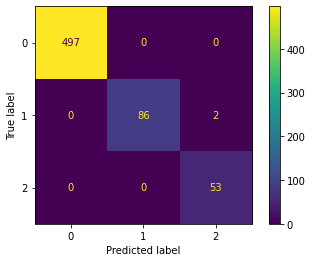

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       497
         2.0       1.00      0.98      0.99        88
         3.0       0.96      1.00      0.98        53

    accuracy                           1.00       638
   macro avg       0.99      0.99      0.99       638
weighted avg       1.00      1.00      1.00       638

